# Setting

In [4]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

# matplotlib에 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
fm.fontManager.addfont(font_path)  # 나눔고딕 폰트를 추가
plt.rc('font', family='NanumGothic')  # 폰트 적용


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [5]:
# !pip install yfinance
# !pip install statsmodels


# Read S&P 500

## s&p500크롤링

In [10]:

import os
import yfinance as yf
import pandas as pd

import numpy as np
import statsmodels.api as sm

csv_file_path = "./snp500.csv"

#각 종목의 시가총액 가져오는 함수
def get_market_cap(ticker):
    stock = yf.Ticker(ticker)
    try:
        market_cap = stock.info['marketCap']  # 시가총액
    except KeyError:
        market_cap = None
    return market_cap

# S&P 500 종목 리스트 가져오기 (위키피디아 데이터 활용)
# pd.read_html() 함수는 웹페이지에 있는 HTML 테이블을 DataFrame으로 변환
def load_sp500_data():
    if os.path.exists(csv_file_path):
        print("CSV파일에서 s&p500 데이터를 로드합니다.")
        sp500 = pd.read_csv(csv_file_path)
    else:
         print("웹에서 S&P 500 데이터를 가져옵니다.")
         sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
         sp500['Market Cap'] = sp500['Symbol'].apply(get_market_cap) #시가총액 주가
         sp500.to_csv(csv_file_path, index=False) #데이터를 csv로 저장

    return sp500

# S&P 500 데이터 로드
sp500 = load_sp500_data()


# 시가총액 정보를 추가하기 위해 티커(symbol) 리스트를 추출합니다.
tickers = sp500['Symbol'].tolist()


# 섹터별로 시가총액 상위 4개 종목 선택
top_by_sector = sp500.groupby('GICS Sector').apply(lambda x: x.nlargest(4, 'Market Cap'))

# 산업군 별로 전체 종목 선택
all_per_industry = sp500.groupby('GICS Sub-Industry').apply(lambda x: x)


# 섹터별로 시가총액 상위 종목들 출력
#print(top_by_sector[['Symbol', 'Security', 'Market Cap']])

# 산업군 별 시가총액 상위 종목 출력
#print(all_per_industry[['Symbol', 'Security', 'Market Cap']])

# 파일로 저장
sp500.to_csv("./snp500.csv", index=False)  # 이미 데이터가 있으면 덮어쓰지 않음


CSV파일에서 s&p500 데이터를 로드합니다.


C:\Users\eujin\AppData\Local\Temp\ipykernel_8124\2441607701.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_sector = sp500.groupby('GICS Sector').apply(lambda x: x.nlargest(4, 'Market Cap'))


                                              Symbol  \
GICS Sub-Industry                                      
Advertising                               355    OMC   
                                          255    IPG   
Aerospace & Defense                       209     GE   
                                          395    RTX   
                                          293    LMT   
...                                              ...   
Transaction & Payment Processing Services 306     MA   
                                          198     FI   
                                          368   PYPL   
Water Utilities                           30     AWK   
Wireless Telecommunication Services       434   TMUS   

                                                                           Security  \
GICS Sub-Industry                                                                     
Advertising                               355                         Omnicom Group   
          

C:\Users\eujin\AppData\Local\Temp\ipykernel_8124\2441607701.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_per_industry = sp500.groupby('GICS Sub-Industry').apply(lambda x: x.nlargest(4, 'Market Cap'))


## 섹터, 산업군 별 데이터

In [17]:

from statsmodels.tsa.stattools import adfuller

# 각 섹터의 종목 데이터를 가져오기 위한 함수
def get_data(tickers, start_date="2021-01-01", end_date="2023-01-01"):
    # 데이터 수집 (Adjusted Close 가격을 가져옴)
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data


#기본 분석 기간 설정
default_start_date = "2020-01-01"
default_end_date = "2023-01-01"

#섹터 데이터 예시
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()

it_sector_data = get_data(it_sector_tickers)


#산업군 데이터 예시
it_industry_tickers = all_per_industry.loc['Advertising']['Symbol'].tolist()

it_industry_data = get_data(it_industry_tickers)


# 종목 간 상관관계 계산
#섹터
sector_correlation_matrix = it_sector_data.corr()
print("섹터 상관관계 매트릭스:")
print(sector_correlation_matrix)


#산업군
industry_correlation_matrix = it_industry_data.corr()
print("산업군 상관관계 매트릭스:")
print(industry_correlation_matrix)


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  2 of 2 completed

섹터 상관관계 매트릭스:
Ticker      AAPL      AVGO      MSFT      NVDA
Ticker                                        
AAPL    1.000000  0.818889  0.733524  0.695443
AVGO    0.818889  1.000000  0.658584  0.694123
MSFT    0.733524  0.658584  1.000000  0.947690
NVDA    0.695443  0.694123  0.947690  1.000000
산업군 상관관계 매트릭스:
Ticker       IPG       OMC
Ticker                    
IPG     1.000000  0.577018
OMC     0.577018  1.000000


## 볼린저 밴드 그래프 함수, 안정적 페어 고르기 함수

[*********************100%***********************]  4 of 4 completed
C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: AAPL and NVDA


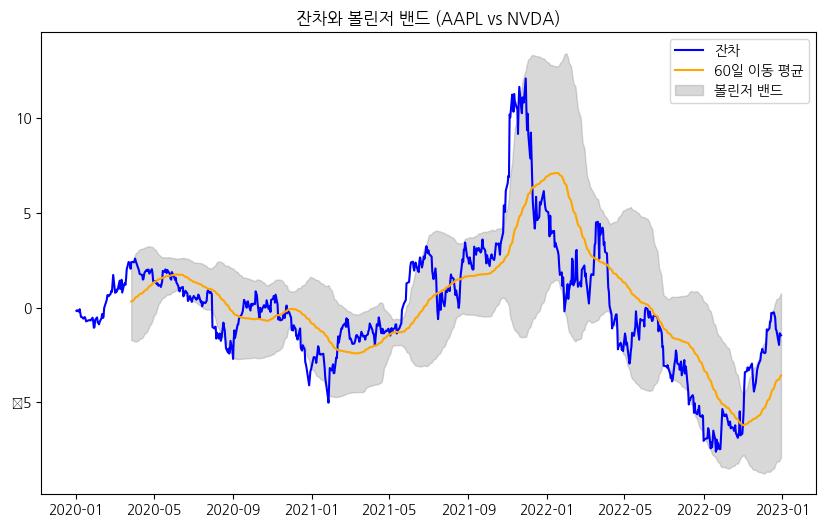


Analyzing Pair: AAPL and MSFT


C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


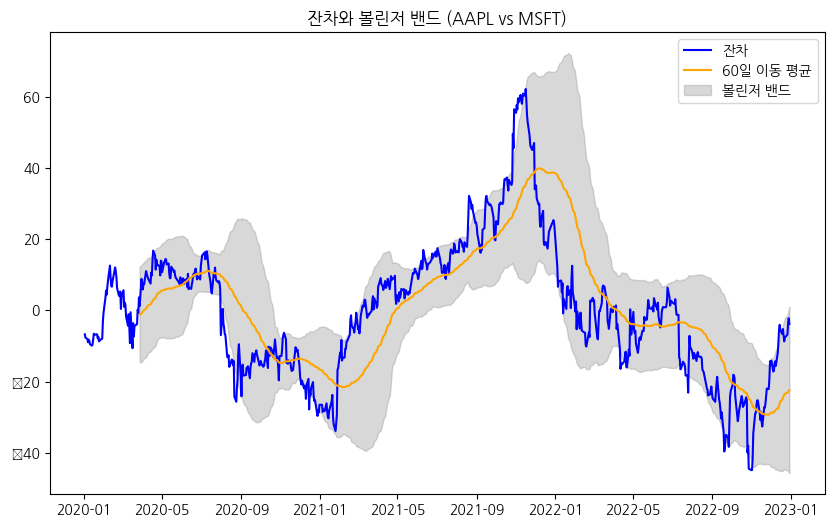


Analyzing Pair: AAPL and AVGO


C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


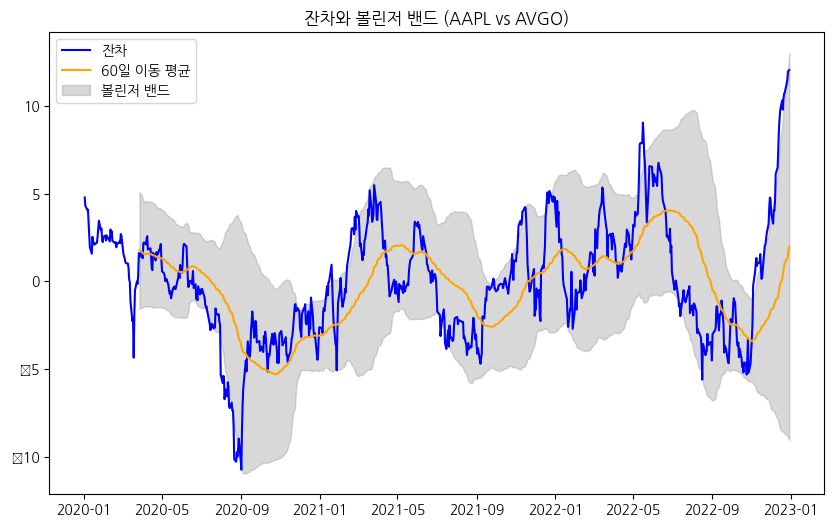


Analyzing Pair: NVDA and MSFT


C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


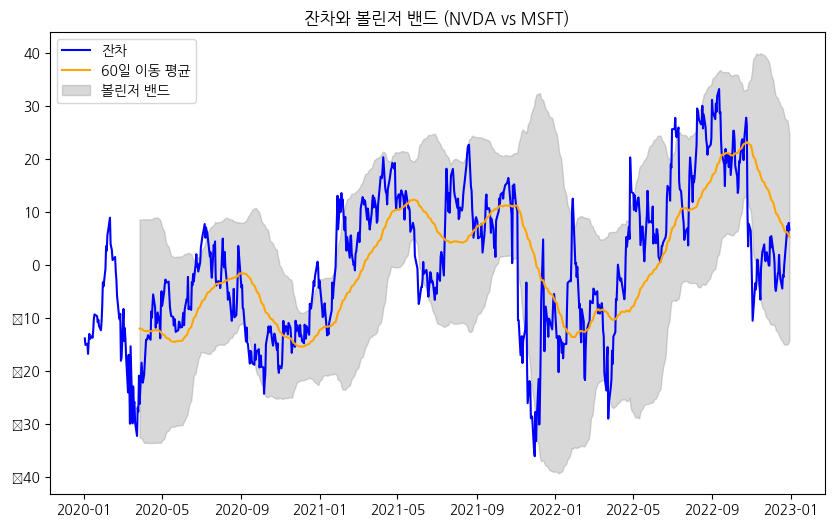


Analyzing Pair: NVDA and AVGO


C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


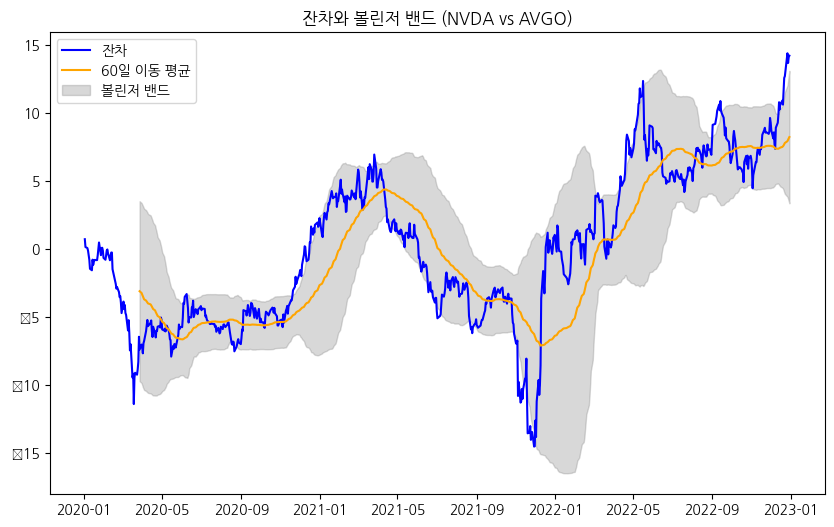


Analyzing Pair: MSFT and AVGO


C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


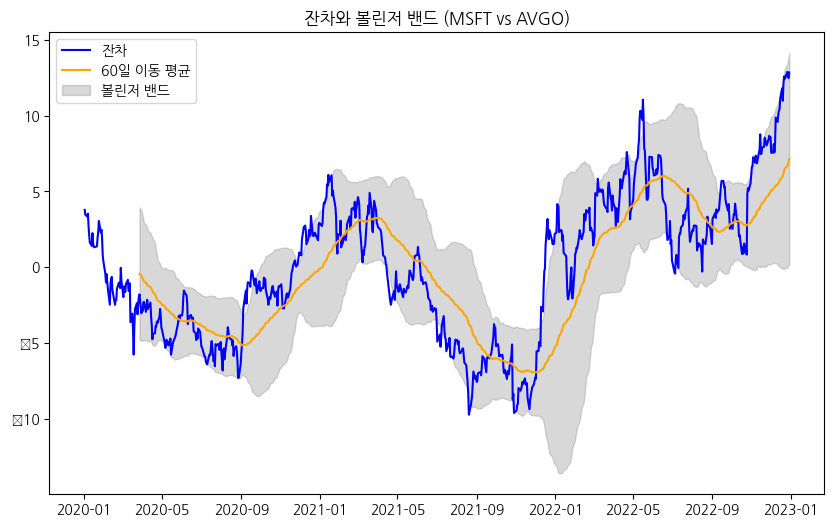

In [20]:
# -------- 코드 셀 2: 볼린저 밴드 그래프 및 안정적인 페어 선택 --------
import itertools

def draw_graph(data, pair):
    x_ticker, y_ticker = pair
    print(f"\nAnalyzing Pair: {x_ticker} and {y_ticker}")

    # OLS 회귀 분석
    x = data[x_ticker]
    y = data[y_ticker]
    x = sm.add_constant(x)  # 상수항 추가
    ols_model = sm.OLS(y, x).fit()
    residuals = ols_model.resid  # 잔차 계산

    # 60일 이동 평균과 표준편차 계산
    moving_avg = residuals.rolling(window=60).mean()
    moving_std = residuals.rolling(window=60).std()

    # 볼린저 밴드 계산
    upper_band = moving_avg + (2 * moving_std)
    lower_band = moving_avg - (2 * moving_std)
    
    # 매매 규칙
    # 잔차가 상단을 넘으면 매도, 하단을 넘으면 매수
    entry_signals = (residuals > upper_band) | (residuals < lower_band)
    exit_signals = residuals.rolling(window=60).mean().shift(1)  # 이동평균선이 교차할 때 청산

    # 볼린저 밴드와 잔차 시각화
    plt.figure(figsize=(10,6))
    plt.plot(residuals, label='잔차', color='blue')
    plt.plot(moving_avg, label='60일 이동 평균', color='orange')
    plt.fill_between(residuals.index, lower_band, upper_band, color='gray', alpha=0.3, label='볼린저 밴드')
    plt.legend()
    plt.title(f'잔차와 볼린저 밴드 ({x_ticker} vs {y_ticker})')
    plt.show()

# -------- 동적 선택을 통한 페어 분석 함수 --------
def analyze_by_selection(selection_type, selection_name, start_date, end_date):
    if selection_type == "sector":
        # 선택한 섹터로 분석
        tickers = top_by_sector.loc[selection_name]['Symbol'].tolist()
        data_func = get_data
    elif selection_type == "industry":
        # 선택한 산업군으로 분석
        tickers = all_per_industry.loc[selection_name]['Symbol'].tolist()  # 산업군 선택
        data_func = get_data
    else:
        print("올바르지 않은 선택입니다. 섹터 또는 산업군을 입력하세요.")
        return

    # 페어 분석 수행
    analyze_pairs(data_func, tickers, start_date, end_date)


# -------- 페어 분석 및 안정적인 페어 선택 함수 --------
def analyze_pairs(data_func, tickers, start_date, end_date):
    # 데이터 수집
    data = data_func(tickers, start_date=start_date, end_date=end_date)

    # 모든 종목 쌍(페어) 구성 (itertools를 사용해 두 종목씩 페어를 만듦)
    pairs = list(itertools.combinations(tickers, 2))

    # 각 페어에 대해 볼린저 밴드 그래프를 그립니다.
    for pair in pairs:
        draw_graph(data, pair)


# -------- 안정적인 페어 선택 함수 --------
def select_stable_pair(data_func, tickers, start_date, end_date, adf_threshold=0.05):
    data = data_func(tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        # TODO: 티커 2개를 받아서 p-value를 반환하는 함수로 분리하기
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # NaN이나 inf 값을 제거
        residuals_clean = residuals.replace([np.inf, -np.inf], np.nan).dropna()

        # 잔차의 표준편차 계산
        residual_std = residuals_clean.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        if len(residuals_clean) > 0:
            adf_result = adfuller(residuals_clean)
            print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

            # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
            if residual_std < lowest_std and adf_result[1] < adf_threshold:
                stable_pair = (x_ticker, y_ticker)
                lowest_std = residual_std
        else:
            print(f"Pair: {x_ticker} and {y_ticker} contains insufficient data (all NaNs or infs). Skipping this pair.")

    # TODO: 그림 그리기 분리
    if stable_pair:
        draw_graph(data, stable_pair)

    return stable_pair

# -------- 사용자 선택 기반 페어 분석 실행 --------
selection_type = input("분석하려는 선택을 입력하세요 (sector or industry): ")
selection_name = input("분석할 섹터 또는 산업군의 이름을 입력하세요: ")
analyze_by_selection(selection_type, selection_name, start_date="2020-01-01", end_date="2023-01-01")



## 섹터 별 볼린저 밴드 및 안정적 페어 찾기

### 1. Information Technology

#### 1. 모든 페어 분석

In [ ]:
# 1. Information Technology 섹터의 모든 페어 분석
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()
analyze_sector_pairs(it_sector_tickers, start_date=default_start_date, end_date=default_end_date)

industry_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()  # 산업군 데이터 사용
analyze_industry_pairs(industry_tickers, start_date=default_start_date, end_date=default_end_date)


#### 1. 안정적 페어

In [ ]:
# 정보기술 Information Technology 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers, start_date=default_start_date, end_date=default_end_date)

# TODO
#if stable_it_pair:
#    draw_graph()

print(f"가장 안정적인 페어: {stable_it_pair}")

# 1. Information Technology 섹터의 모든 페어 분석
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()
analyze_sector_pairs(it_sector_tickers, start_date=default_start_date, end_date=default_end_date)

industry_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()  # 산업군 데이터 사용
analyze_industry_pairs(industry_tickers, start_date=default_start_date, end_date=default_end_date)



### 2. Energy

#### 2. 모든 페어 분석

In [ ]:
# 2. Energy 섹터의 모든 페어 분석
energy_sector_tickers = top_by_sector.loc['Energy']['Symbol'].tolist()
analyze_sector_pairs(energy_sector_tickers, start_date=default_start_date, end_date=default_end_date)

#### 2. 안정적 페어

In [ ]:
# Energy 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Energy']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers,  start_date=default_start_date, end_date=default_end_date)
print(f"가장 안정적인 페어: {stable_it_pair}")


### 3. Consumer Discretionary

#### 3. 모든 페어 분석

In [ ]:
# 3. Consumer Discretionary 섹터의 모든 페어 분석
consumer_discretionary_tickers = top_by_sector.loc['Consumer Discretionary']['Symbol'].tolist()
analyze_sector_pairs(consumer_discretionary_tickers,  start_date=default_start_date, end_date=default_end_date)

#### 3. 안정적 페어

In [ ]:
# 임의소비재Consumer Discretionary 섹터의 가장 안정적인 페어 선택

# Consumer Discretionary 섹터의 시가총액 상위 10개 종목 선택 (기존 4개에서 확장)
consumer_discretionary_top = sp500[sp500['GICS Sector'] == 'Consumer Discretionary'].nlargest(10, 'Market Cap')

# Consumer Discretionary 섹터의 종목 티커 리스트 생성
consumer_tickers = consumer_discretionary_top['Symbol'].tolist()

#it_sector_tickers = top_by_sector.loc['Consumer Discretionary']['Symbol'].tolist()
stable_consumer_pair = select_stable_pair(consumer_tickers, start_date=default_start_date, end_date=default_end_date, adf_threshold = 0.05)
print(f"가장 안정적인 페어: {stable_consumer_pair}")


### 4. Health Care

#### 4. 모든 페어 분석

In [ ]:
# 4. Health Care 섹터의 모든 페어 분석
health_care_tickers = top_by_sector.loc['Health Care']['Symbol'].tolist()
analyze_sector_pairs(health_care_tickers, start_date=default_start_date, end_date=default_end_date)

#### 4. 안정적 페어

In [ ]:
# Health Care 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Health Care']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers,  start_date=default_start_date, end_date=default_end_date)
print(f"가장 안정적인 페어: {stable_it_pair}")


### 5. Financials

#### 5. 모든 페어 분석

In [ ]:
# 5. Financials 섹터의 모든 페어 분석
financials_tickers = top_by_sector.loc['Financials']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)


#### 5. 안정적 페어

In [ ]:
# Financials 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Financials']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers, start_date=default_start_date, end_date=default_end_date)
print(f"가장 안정적인 페어: {stable_it_pair}")


### 6. Communication Services

#### 6. 모든 페어 분석

In [ ]:
# 6. Communication Services 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Communication Services']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)


#### 6. 안정적 페어

In [ ]:
# Communication Services 섹터의 시가총액 상위 10개 종목 선택 (기존 4개에서 확장)
communication_services_top = sp500[sp500['GICS Sector'] == 'Communication Services'].nlargest(10, 'Market Cap')

# Communication Services 섹터의 종목 티커 리스트 생성
communication_tickers = communication_services_top['Symbol'].tolist()

# 페어 분석 및 안정적인 페어 선택 (ADF p-value 기준 0.05로 설정)
stable_communication_pair = select_stable_pair(communication_tickers, start_date=default_start_date, end_date=default_end_date, adf_threshold=0.05)
print(f"Communication Services 가장 안정적인 페어: {stable_communication_pair}")


### 7. Consumer Staples

#### 7. 모든 페어 분석

In [ ]:
# 7. Consumer Staples 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Consumer Staples']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)

#### 7. 안정적 페어

In [ ]:
# 필수 소비재 Consumer Staples 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Consumer Staples']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers, start_date=default_start_date, end_date=default_end_date)
print(f"가장 안정적인 페어: {stable_it_pair}")


### 8. Industrials

#### 8. 모든 페어 분석

In [ ]:
# 8. Industrials 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Industrials']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)

#### 8. 안정적 페어

In [ ]:
# Industrials 섹터의 시가총액 상위 10개 종목 선택 (기존 4개에서 확장)
industrials_top = sp500[sp500['GICS Sector'] == 'Industrials'].nlargest(10, 'Market Cap')

# Industrials Services 섹터의 종목 티커 리스트 생성
industrials_tickers = industrials_top['Symbol'].tolist()

# 페어 분석 및 안정적인 페어 선택 (ADF p-value 기준 0.1로 설정)
stable_industrials_pair = select_stable_pair(industrials_tickers, start_date=default_start_date, end_date=default_end_date, adf_threshold=0.05)
print(f"Industrialsn Services 가장 안정적인 페어: {stable_industrials_pair}")


### 9. Materials

#### 9. 모든 페어 분석

In [ ]:
# 9. Materials 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Materials']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)

#### 9. 안정적 페어

In [ ]:
# Materials 섹터의 시가총액 상위 10개 종목 선택 (기존 4개에서 확장)
materials_top = sp500[sp500['GICS Sector'] == 'Materials'].nlargest(10, 'Market Cap')

# Materials 섹터의 종목 티커 리스트 생성
materials_tickers = materials_top['Symbol'].tolist()

# 페어 분석 및 안정적인 페어 선택 (ADF p-value 기준 0.05로 설정)
stable_materials_pair = select_stable_pair(materials_tickers, start_date=default_start_date, end_date=default_end_date, adf_threshold=0.05)
print(f"Materials 가장 안정적인 페어: {stable_materials_pair}")


### 10. Real Estate

#### 10. 모든 페어 분석

In [ ]:
# 10. Real Estate 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Real Estate']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)

#### 10. 안정적 페어 

In [ ]:
# Real Estate 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Real Estate']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers, start_date=default_start_date, end_date=default_end_date)
print(f"가장 안정적인 페어: {stable_it_pair}")


### 11. Utilities

#### 11. 모든 페어 분석

In [ ]:
# 11. Utilities 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Utilities']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers, start_date=default_start_date, end_date=default_end_date)

#### 11 안정적 페어

In [ ]:
# Utilities 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Utilities']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers, start_date=default_start_date, end_date=default_end_date, adf_threshold = 0.1)
print(f"가장 안정적인 페어: {stable_it_pair}")
